<div style="border:solid green 2px; padding: 20px">

<b>Привет, Алексей! Поздравляю с выполнением очередного проекта!</b>

Меня зовут Петр Раздобреев и я буду проверять твою работу. Попробую помочь сделать тебе её еще лучше! В Практикуме принято общени на ты, но если это дискомфортно, то сообщи об этом)

Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ Так выделены небольшие замечания.Такие замечания в проекте допустимы, это пространство для улучшений в будущем.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️Так я выделяю успешные идеи.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
    

### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ 

Прошу в будущем обращать внимание на введение, не забывать добавлять названия проекта, цели и задачи, краткое содержание, а также описание данных, такое введение также будет полезно и твоим коллегам для погружения в контекст задачи
</div>

In [1]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

In [3]:
visits

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
...,...,...,...,...,...,...
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 14:39:29
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:52,2019-10-31 22:39:36
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:48,2019-10-31 01:41:31
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55


In [4]:
orders

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
...,...,...,...
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99


In [5]:
costs

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0
1796,2019-10-24,lambdaMediaAds,6.4
1797,2019-10-25,lambdaMediaAds,8.8
1798,2019-10-26,lambdaMediaAds,8.8


In [6]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [7]:
visits['Session Start'] = pd.to_datetime(visits['Session Start'], format="%Y-%m-%d %H:%M:%S")
visits['Session End'] = pd.to_datetime(visits['Session End'], format="%Y-%m-%d %H:%M:%S")

In [8]:
visits.columns = visits.columns.str.lower()
visits.columns = visits.columns.str.replace(' ', '_')

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Отличный способ замены названий столбцов, есть ещё вот такой вариант `visits.columns = [x.lower().replace(' ', '_') for x in visits.columns]`
    

In [9]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [10]:
visits['user_id'].value_counts()

33606575057     46
943775408561    36
901180916748    35
870784569391    34
764086596354    33
                ..
350468480225     1
748123264144     1
909267360937     1
816252757222     1
425788122907     1
Name: user_id, Length: 150008, dtype: int64

Уникальных пользователей 150008, есть пользователи совершающие повторные покупки

In [11]:
visits['region'].value_counts()

United States    207327
UK                36419
France            35396
Germany           30759
Name: region, dtype: int64

In [12]:
visits['device'].value_counts()

iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: device, dtype: int64

In [13]:
visits['channel'].value_counts()

organic               107760
TipTop                 54794
FaceBoom               49022
WahooNetBanner         20465
LeapBob                17013
OppleCreativeMedia     16794
RocketSuperAds         12724
YRabbit                 9053
MediaTornado            8878
AdNonSense              6891
lambdaMediaAds          6507
Name: channel, dtype: int64

In [14]:
visits['session_start'].value_counts()

2019-06-27 14:56:41    3
2019-10-10 22:50:07    3
2019-08-24 12:06:37    3
2019-10-22 17:17:39    3
2019-10-26 12:40:03    3
                      ..
2019-05-26 12:24:05    1
2019-08-28 17:43:34    1
2019-10-11 08:34:00    1
2019-05-13 07:58:36    1
2019-06-25 21:23:48    1
Name: session_start, Length: 306813, dtype: int64

In [15]:
visits['session_end'].value_counts()

2019-08-04 10:32:15    3
2019-09-23 20:37:13    3
2019-08-03 06:31:26    3
2019-09-29 17:32:12    3
2019-09-26 08:30:19    3
                      ..
2019-10-27 23:08:22    1
2019-08-25 01:02:51    1
2019-06-17 02:33:04    1
2019-10-16 03:17:54    1
2019-05-08 23:10:58    1
Name: session_end, Length: 306793, dtype: int64

In [16]:
visits.duplicated().sum()

0

In [17]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [18]:
orders['Event Dt'] = pd.to_datetime(orders['Event Dt'], format="%Y-%m-%d %H:%M:%S")

In [19]:
orders.columns = orders.columns.str.lower()
orders.columns = orders.columns.str.replace(' ', '_')

In [20]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [21]:
orders['user_id'].value_counts()

901180916748    22
883098437811    20
75337957494     19
512471511263    19
295795879965    19
                ..
237296010927     1
319939546352     1
742075710598     1
202972423389     1
775233404832     1
Name: user_id, Length: 8881, dtype: int64

In [22]:
orders['event_dt'].value_counts()

2019-09-29 09:03:24    2
2019-10-25 16:24:24    2
2019-09-27 03:56:55    2
2019-08-12 22:50:49    2
2019-09-09 20:01:39    2
                      ..
2019-09-26 04:24:10    1
2019-10-26 06:25:45    1
2019-07-10 17:04:38    1
2019-08-06 08:55:42    1
2019-09-25 16:41:33    1
Name: event_dt, Length: 40163, dtype: int64

In [23]:
orders['revenue'].value_counts()

4.99     38631
5.99       780
9.99       385
49.99      212
19.99      204
Name: revenue, dtype: int64

In [24]:
orders.duplicated().sum()

0

In [25]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [26]:
costs['dt'] = pd.to_datetime(costs['dt'], format="%Y-%m-%d")

In [27]:
costs.columns = costs.columns.str.lower()

In [28]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [29]:
costs['dt'].value_counts()

2019-10-06    10
2019-10-16    10
2019-05-06    10
2019-09-06    10
2019-08-04    10
              ..
2019-10-05    10
2019-09-20    10
2019-08-08    10
2019-05-24    10
2019-05-02    10
Name: dt, Length: 180, dtype: int64

In [30]:
costs['channel'].value_counts()

LeapBob               180
WahooNetBanner        180
lambdaMediaAds        180
RocketSuperAds        180
YRabbit               180
TipTop                180
AdNonSense            180
FaceBoom              180
OppleCreativeMedia    180
MediaTornado          180
Name: channel, dtype: int64

In [31]:
costs['costs'].value_counts()

6.40      26
3.36      21
9.60      20
16.80     19
4.32      17
          ..
217.80     1
186.20     1
176.70     1
273.00     1
55.00      1
Name: costs, Length: 608, dtype: int64

In [32]:
costs.duplicated().sum()

0

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Ты многократно писал очень схожие куски кода, но можно ведь сделать функции для первичного анализа датафреймов, смотреть распределение численных значений при помощи `describe`, анализировать какие строки наиболее частые при помощи `value_counts`, ну и `head` с `info` в эту же функцию первичного анализа стоит поместить, и при помощи нее можно получать первоначальную информацию о каждом датасете по вызову функции к каждому новому датасету, ну и такую функцию переносить из проекта в проект, чтобы максимально упрощать себе первичный анализ и оставлять больше сил и времени на исследования). 
    
Безусловно в этом проекте нет необходимости в глубоком анализе данных, но например можно добавить переименование столбцов в неё
</div>

Была выполнена переработка данных, изменены типы данных у столбцов с датой и временем, все названия столбцов приведены к змеиному типу. Дубликатов в строках ни в одной из трех таблиц не найдено.

Также было выявлено, что из 309901 пользователей 150008 уникальных. По странам распределение выглядит следующим образом, United States-207327, UK-36419, France-35396, Germany-30759. Распределение устройств выглядит так: iPhone- 112603, Android-72590, PC-62686, Mac-62022. Большинство клиентов пришли самостоятельно.

В таблице о заказах 40212 записей, 8881 пользователей оформивших заказы, а в таблице с затратами на маркетинг 1800 записей с 180 уникальными датами.

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [33]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles
 

In [34]:
profiles = get_profiles(visits, orders, None, costs)
display(profiles.head(5))

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    

* По умолчанию итак подставляется пять в скобках, можно писать просто вот так `df.head()`
* В последней строке ячейки можно писать просто название переменной и этого будет достаточно для вывода на экран без `display`
</div>

In [35]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [36]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [37]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [38]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [39]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [40]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [41]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [42]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14 # горизонт анализа

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
        
Все необходимые функции были заданы, можно приступать к анализу. В принципе можно было добавить `markdown` заголовков, чтобы разграничить функции и упростить поиск нужной

</div>

Момент анализа зададим 1 ноября 2019 года, а горизонт анализа 14 дней, были заданы функции для расчёта и анализа LTV, ROI, удержания и конверсии.

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

**Составим профили пользователей и определим минимальную и максимальную даты привлечения пользователей**

In [43]:
profiles = get_profiles(visits, orders, None, costs)
display(profiles.head(5)) 

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [44]:
min_date = profiles['dt'].min()
max_date = profiles['dt'].max()
print(min_date, max_date)

2019-05-01 2019-10-27


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Отлично, маленький спойлер и в жизни и даже в проектах Практикума не всегда описание временного интервала будет совпадать с реальными данными, поэтому лучше интервал всегда проверять)
</div>

Получили профили пользователей.
Даты соотносятся с указанными в задании (с 1 мая по 27 октября 2019 года)

**Выясним из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построем таблицу, отражающую количество пользователей и долю платящих из каждой страны.**

In [45]:
user_region = pd.DataFrame()
user_region['user'] = profiles.groupby('region')['user_id'].count()
user_region['user_share'] = ((user_region['user'] / profiles['region'].count()) * 100)
user_region['buyer'] = profiles.query('payer == True').groupby('region')['user_id'].count()
user_region['buyer_share'] = user_region['buyer'] / user_region['user'] * 100
user_region.sort_values(by='user', ascending=False)

,user,user_share,buyer,buyer_share
region,,,,
United States,100002,66.664445,6902,6.901862
UK,17575,11.716042,700,3.982930
France,17450,11.632713,663,3.799427
Germany,14981,9.986801,616,4.111875


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
* В принципе можно было посчитать процент платящих, применив `mean` к столбцу `payer`,
    
* Старайся округлять числа, чтобы у них не было таких длинных хвостов, есть любопытный способ, который позволяет облагородить вывод в частности и дробей - `style.format`, начать читать про него можно [тут]('https://habr.com/ru/post/521894/')

* Очень схожие действия для построения агрегации по странам, каналам, устройствам, рекомендую сделать для этого функцию и сократить количество схожих строчек кода.

</div>

Больше всего пользователей приходит из США (100002 пользователей или 66,7%), следом идут пользователи из Великобритании и Франции (по 11%), и меньше всего пользователей из Германии(10%).

Разбивка по платящим клиентам немного отличается, лидером опять является СЩА с показателем 6902 пользователя или 6,9% от числа всех пользователей из США, следом идет Германия с показателем 4,1%, у Великабритании 4%, а у Франции 3,8%

**Узнаем какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.**

In [46]:
user_device = pd.DataFrame()
user_device['user'] = profiles.groupby('device')['user_id'].count()
user_device['user_share'] = ((user_device['user'] / profiles['device'].count()) * 100)
user_device['buyer'] = profiles.query('payer == True').groupby('device')['user_id'].count()
user_device['buyer_share'] = user_device['buyer'] / user_device['user'] * 100
user_device.sort_values(by='user', ascending=False)

,user,user_share,buyer,buyer_share
device,,,,
iPhone,54479,36.317396,3382,6.207897
Android,35032,23.353421,2050,5.851793
PC,30455,20.302251,1537,5.046790
Mac,30042,20.026932,1912,6.364423


Больше всего пользователей используют iPhone (36,3%), следом Android (23,4%), и по 20% у PC и Mac.

Доля платящих примерно равная на устройствах, но больше у Mac(6,4%) и iPhone (6,2%), у Android 5,9%, PC 5% 

**Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения**

In [47]:
user_channel = pd.DataFrame()
user_channel['user'] = profiles.groupby('channel')['user_id'].count()
user_channel['user_share'] = ((user_channel['user'] / profiles['channel'].count()) * 100)
user_channel['buyer'] = profiles.query('payer == True').groupby('channel')['user_id'].count()
user_channel['buyer_share'] = user_channel['buyer'] / user_channel['user'] * 100
user_channel.sort_values(by='user', ascending=False)

,user,user_share,buyer,buyer_share
channel,,,,
organic,56439,37.623993,1160,2.055316
FaceBoom,29144,19.428297,3557,12.204914
TipTop,19561,13.039971,1878,9.600736
OppleCreativeMedia,8605,5.736361,233,2.707728
LeapBob,8553,5.701696,262,3.063253
WahooNetBanner,8553,5.701696,453,5.296387
RocketSuperAds,4448,2.965175,352,7.913669
MediaTornado,4364,2.909178,156,3.574702
YRabbit,4312,2.874513,165,3.826531


Среди лидеров по каналу привлечения идут каналы:
organic - 37,6%
FaceBoom - 19,4%
TipTop - 13,0%
По параметру платящих клиентов лидируют каналы:
FaceBoom - 12,2
AdNonSense - 11,3%
lambdaMediaAds - 10,5%

Таким образом, на данном этапе были определены лидеры стран по количеству пользователей - больше всего пользователей приходит из США (100002 пользователей или 66,7%), следом идут пользователи из Великобритании и Франции (по 11%), и меньше всего пользователей из Германии(10%).

Разбивка по платящим клиентам немного отличается, лидером опять является СЩА с показателем 6902 пользователя или 6,9% от числа всех пользователей из США, следом идет Германия с показателем 4,1%, у Великабритании 4%, а у Франции 3,8%.

Разбивка по устройствам выглдит следующим образом, iPhone (36,3%), следом Android (23,4%), и по 20% у PC и Mac.

Доля платящих примерно равная на устройствах, но больше у Mac(6,4%) и iPhone (6,2%), у Android 5,9%, PC 5%

Лидеры каналов привлечения идут каналы: organic - 37,6% FaceBoom - 19,4% TipTop - 13,0% По параметру платящих клиентов лидируют каналы: FaceBoom - 12,2 AdNonSense - 11,3% lambdaMediaAds - 10,5%

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
От органики так мало платящих, так как зачастую закупочные каналы оптимизируются с целью приведения максимально платящей аудитории, а органические пользователи случаются разные</div>


### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

**Посчитаем общую сумму расходов на маркетинг.**

In [48]:
cos = costs['costs'].sum()
print(cos)

105497.30000000002


Всего было потрачено на маркетинг 105497.3

**Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.**

In [49]:
expense = pd.DataFrame()
expense['expense'] = costs.groupby('channel')['costs'].sum()
expense['expense_share'] = expense['expense'] / cos * 100
expense.sort_values(by='expense', ascending=False)

,expense,expense_share
channel,,
TipTop,54751.30,51.898295
FaceBoom,32445.60,30.754910
WahooNetBanner,5151.00,4.882589
AdNonSense,3911.25,3.707441
OppleCreativeMedia,2151.25,2.039152
RocketSuperAds,1833.00,1.737485
LeapBob,1797.60,1.703930
lambdaMediaAds,1557.60,1.476436
MediaTornado,954.48,0.904744


Половина всех трат приходится на TipTop (51,9%), следом идет FaceBoom с показателем 30,8%, по другим каналам сумма не превышала 5%.

**Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику.**

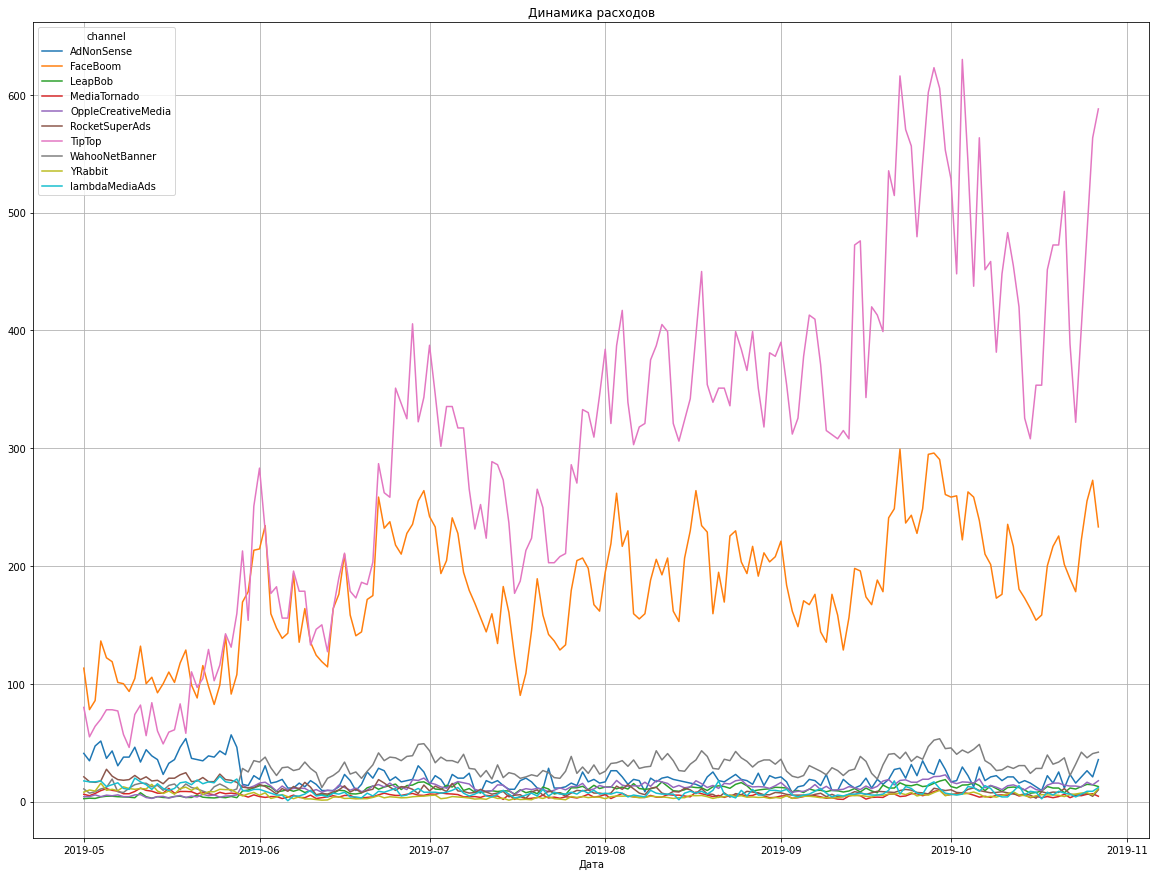

In [50]:
# строим графики изменений

cost_visualization = costs.pivot_table(index='dt', columns='channel', values='costs', aggfunc='sum')

cost_visualization.plot(grid=True, figsize=(20, 15), legend=True)
plt.xlabel('Дата')
plt.title('Динамика расходов')
plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Для того, чтобы внимательнее изучить колебания затрат по каналам можно строить несколько графиков по размеру значений, здесь это не так критично, но вообще не особо понятно, как там дела с бюджетом всех каналов кроме двух крупнейших
</div>

Не понял как добавить деление по неделям код (plt.locator_params(axis='x', nbins=25) не сработал 

На графике прослеживается рост затрат у TipTop и FaceBoom, при относительной стабильности остальных каналов.

**Узнаем сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используем профили пользователей**

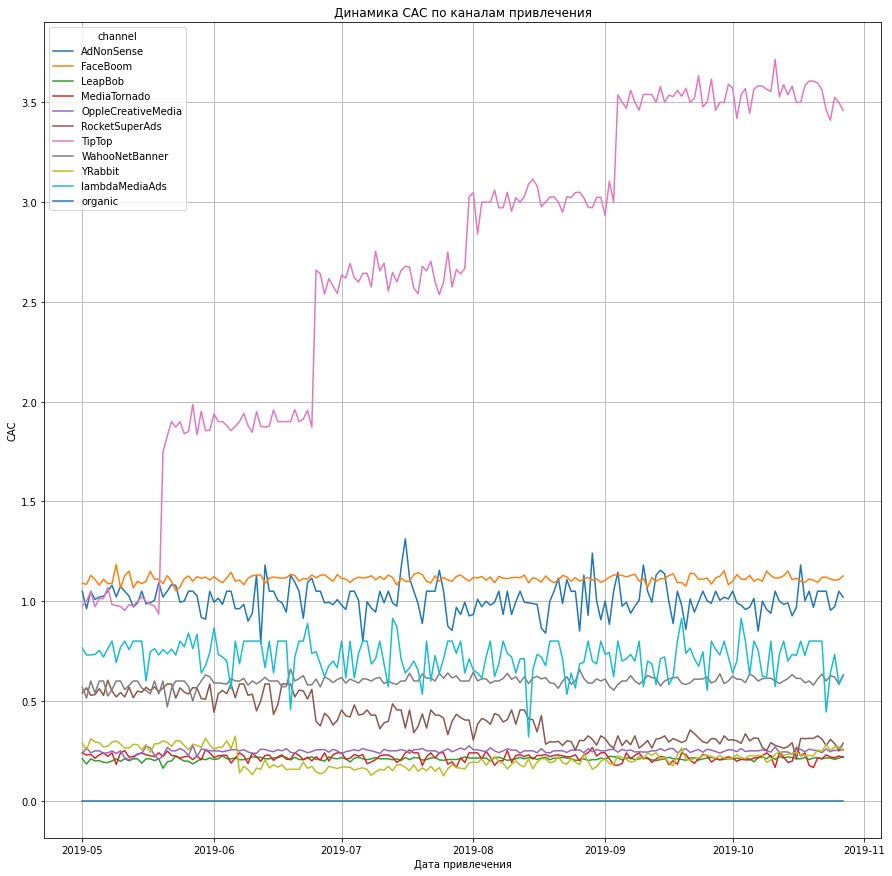

In [51]:
profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(15, 15))
plt.ylabel('CAC')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

In [52]:
cac = pd.DataFrame()
cac['mean'] = profiles.groupby('channel')['acquisition_cost'].mean()
cac.sort_values(by='mean', ascending=False)

,mean
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


По графику прослеживается увелечение средней стоимости привлечения одного клиента у TipTop с 1 до 3,5, при относительной стабильности других каналов (не более 1,5)

При общей сумме затрат на маркетинг 105497.3, Половина всех трат приходится на TipTop (51,9%), далее идет на FaceBoom с показателем 30,8%, по другим каналам сумма не превышала 5%.

Заметен рост затрат на протяжении всего периода у TipTop и FaceBoom, но следует заметить, что прослеживается увелечение средней стоимости привлечения одного клиента у TipTop с 1 до 3,5, при относительной стабильности других каналов (не более 1,5), что может быть сигналом для пересмотра рекламного бюджета на данный канал.

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

**Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI**

In [53]:
# Исключим органический трафик
profiles = profiles.query('channel != "organic"')

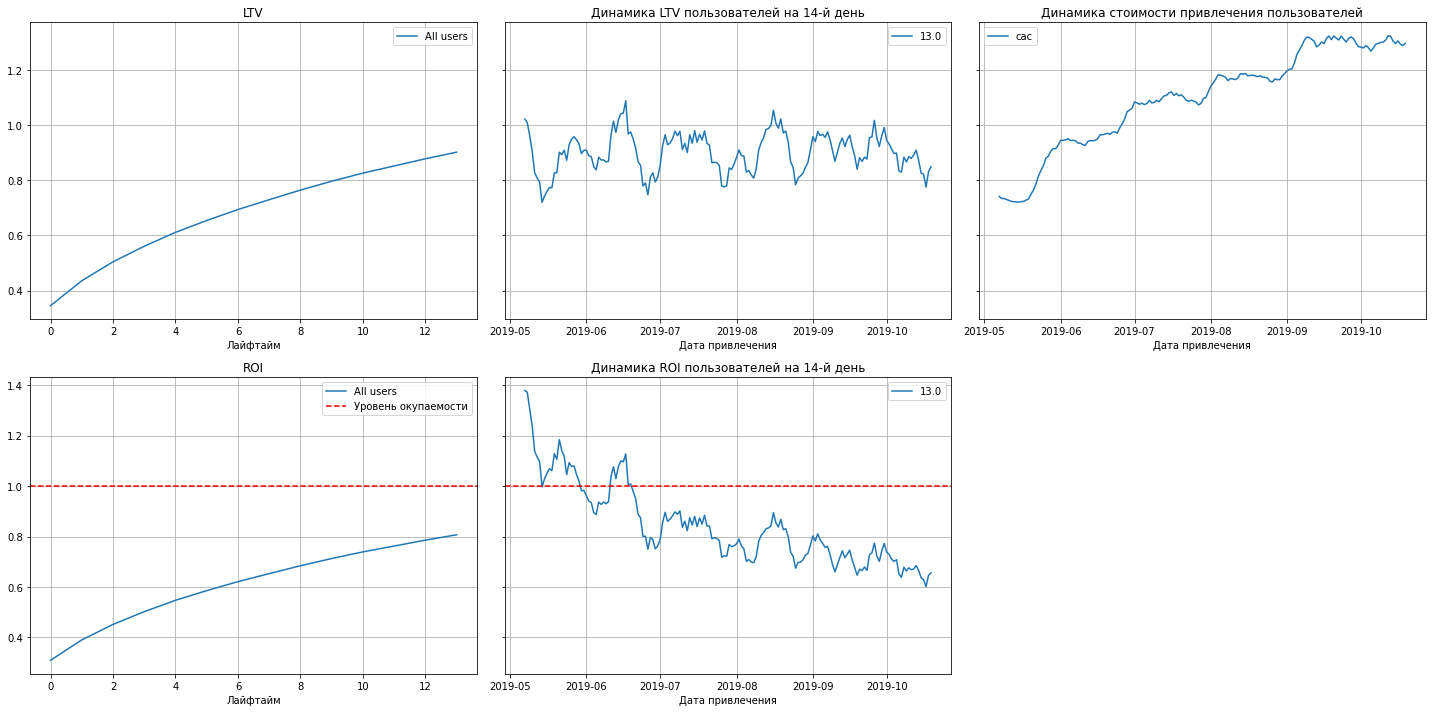

In [54]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
    
Всё так. Но тут любопытно, что LTV стабилен, а `CAC` растёт, вероятно это проявление роста конкуренции на канале.</div>

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️
    
* Здесь и ниже при анализе стоит исключать органический трафик, мы не платим за этих пользователей, а доход от них может завышать довольно плачевную картину и скрыть от нас проблемы в какой-то стране или же типе устройств. Соответственно и выводы после этих правок могут поменяться, поэтому жду исключения из дальнейшего анализа всех органических пользователей и после этого прокомментирую оставшуюся часть проекта. 
* Прошу ещё построить удержание и конверсии по странам, каналам, устройствам</div>

Реклама не окупается, проблема в том, что к концу второй недели ROI на уровне 80%

CAC увеличивается на протяжении всей компании, что является плохим сигналом

На LTV влияет сезонный фактор, но и этот показатель достаточно стабилен. Значит, дело не в ухудшении качества пользователей

**Проверим конверсию и удержанием пользователей и  динамику их изменений.**

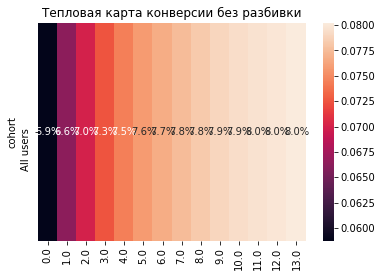

In [55]:
# считаем конверсию без параметра dimensions
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, datetime(2019, 11, 1).date(), 14
)

# строим хитмэп по таблице конверсии
sns.heatmap(conversion.drop(columns=['cohort_size']), annot=True, fmt='.1%')
plt.title('Тепловая карта конверсии без разбивки')
sns.set(rc = {'figure.figsize':(15,10)})
plt.show() 

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   

У `heatmap` есть ещё параметр `linewidth`, рекомендовал бы к использованию, чтобы разделять ячейки
</div>

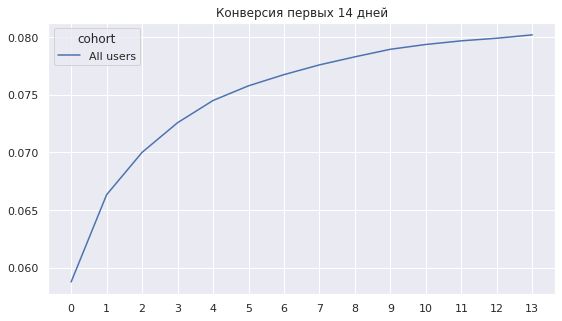

In [56]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, datetime(2019, 11, 1).date(), 14
)

plt.figure(figsize=(20, 5)) # размер сетки для графиков

# для кривых конверсии исключаем размеры когорт
report = conversion.drop(columns=['cohort_size'])
report.T.plot(
    # строим кривые конверсии в первой ячейке таблицы графиков
    grid=True, xticks=list(report.columns.values), ax=plt.subplot(1, 2, 1)
)
plt.title('Конверсия первых 14 дней')


plt.show() 

Общая конверсия растёт от 5,9% в первый день «жизни» пользователей до 8 % на четырнадцатый день, причем во вторую неделю рост практически отсутствует

In [57]:
retention_raw, retention = get_retention(
    profiles, sessions, datetime(2019, 11, 1).date(), 14, dimensions=['dt']
)  # передаём dt в качестве параметра dimensions

# строим тепловую карту
plt.figure(figsize=(15, 6))
sns.heatmap(retention.drop(columns=['cohort_size', 0]), annot=True, fmt='.2%')
plt.title('Тепловая карта удержания')
plt.show()

NameError: name 'sessions' is not defined

<div class="alert alert-danger">
<b>Комментарий ревьюера v2:</b>☁️

Задана переменная `visits`, а `sessions` лишь в коде задания функций
</div>

<div class="alert alert-info"> <b>
Не пойму что не так, почему то ошибка в переменной sessions, однако она была задана

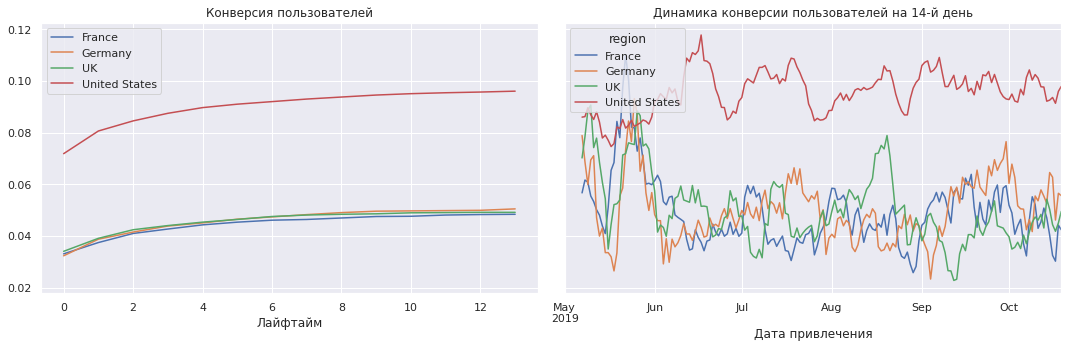

In [58]:
# смотрим конверсию с разбивкой по странам
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

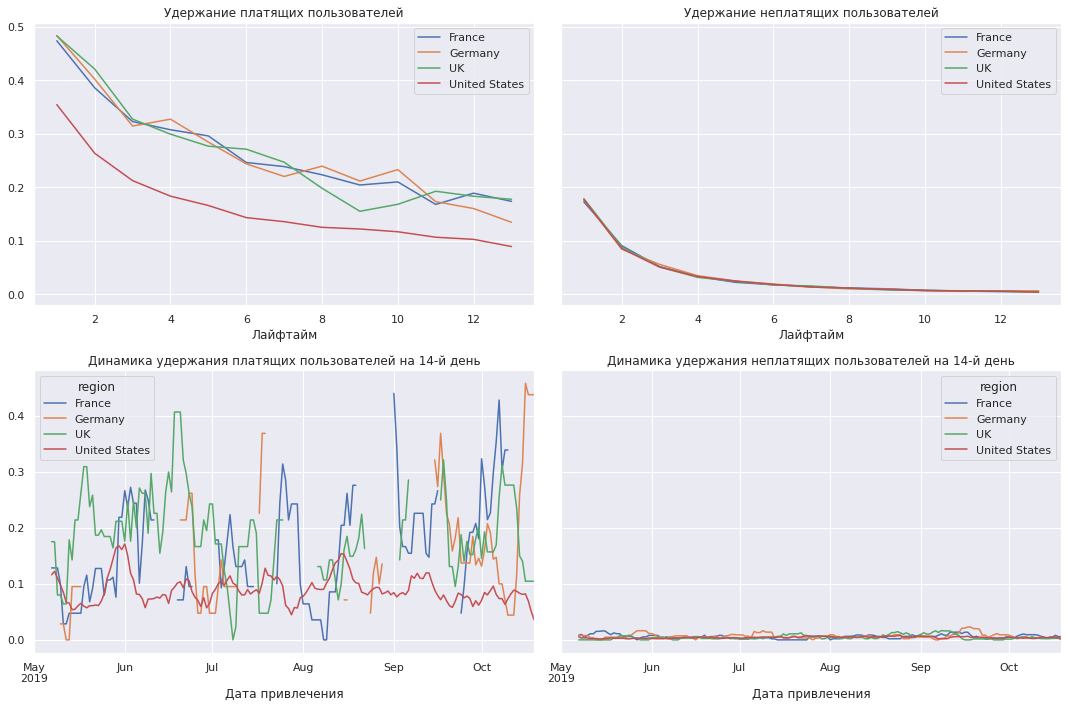

In [59]:
# смотрим удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
    
Существенная проблема - плохое удержание в US, можно было подробнее посмотреть на всех ли каналах, которые приводят трафик в US, такая ситуация, анонсирую, что два самых крупных канала приводят трафик только из US, если захочешь, можешь поисследовать. Любопытно, что динамика конверсии `US` становится с течением времени не такой волатильной. </div>

Заметно, что при самой высокой конверсии, удержиние платящих пользователей из США самое низкое

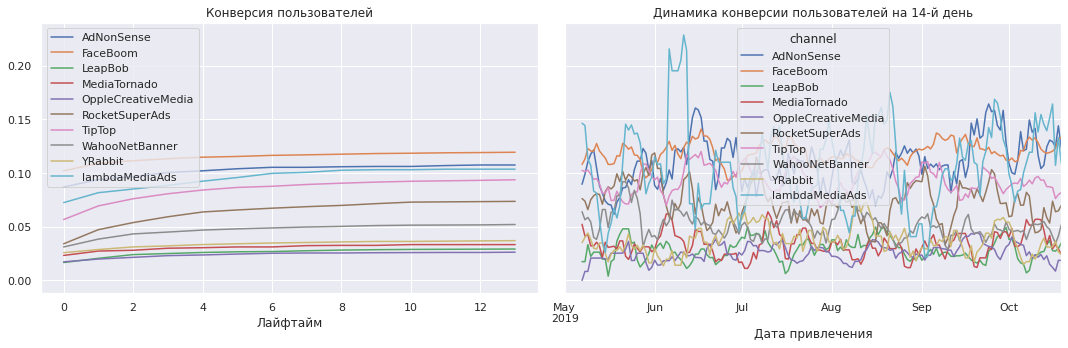

In [60]:
# смотрим конверсию с разбивкой по каналам
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

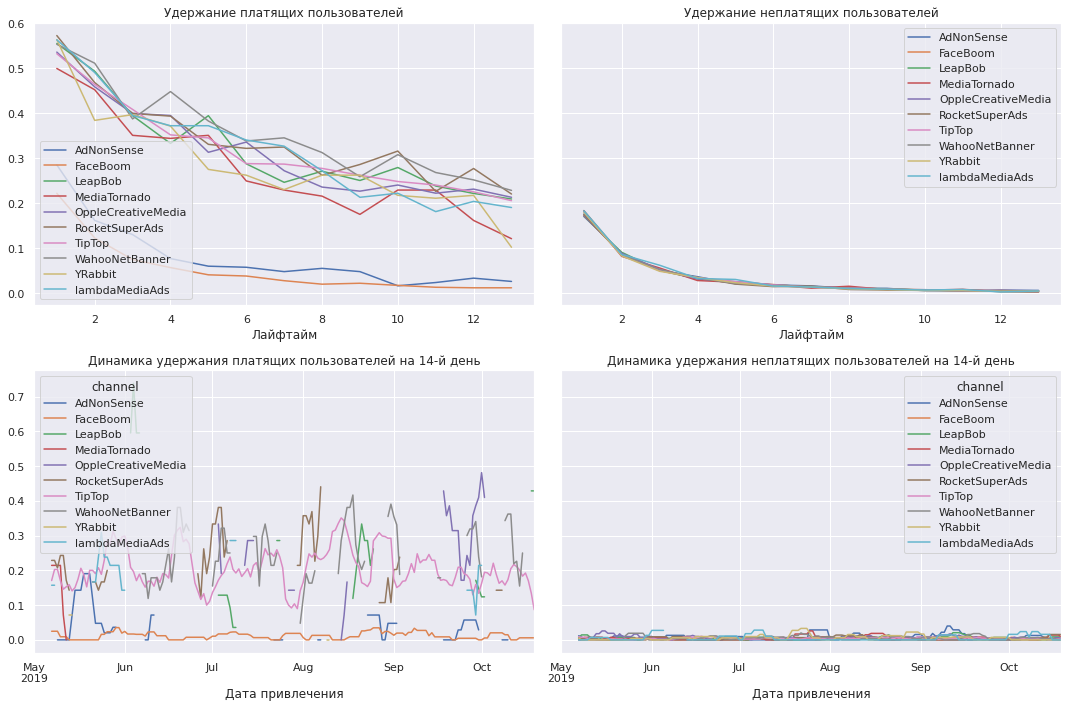

In [61]:
# смотрим удержание с разбивкой по каналам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
    
Обрати внимание, что удержание неплатящих пользователей из разных каналов, стран, платформ ровное, а удержание платящих очень отличается, как считаешь почему так?
</div>

Лидеры по конверсии AdNonSense и FaceBoom имеют самые худшие показатели по удержанию, что давольно странно, так как графики сопостовимы с удержанием неплатящих клиентов, а вот 3 по конверсии канал lambdaMediaAds имеет довольно неплохое удержание.

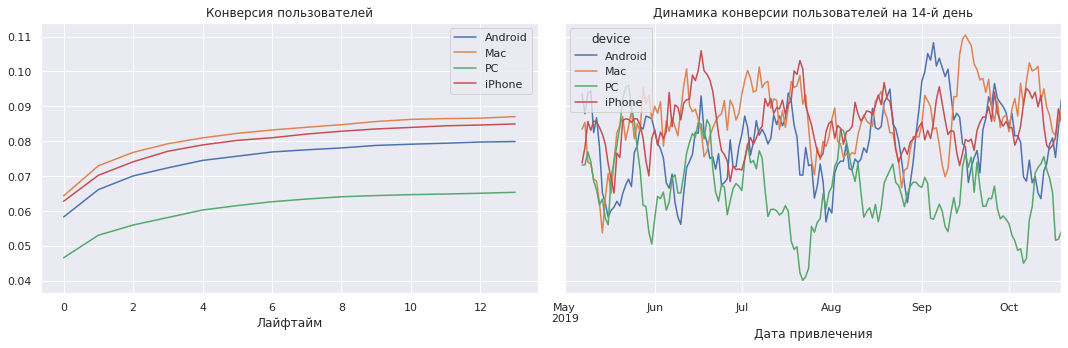

In [62]:
# смотрим конверсию с разбивкой по устройствам
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

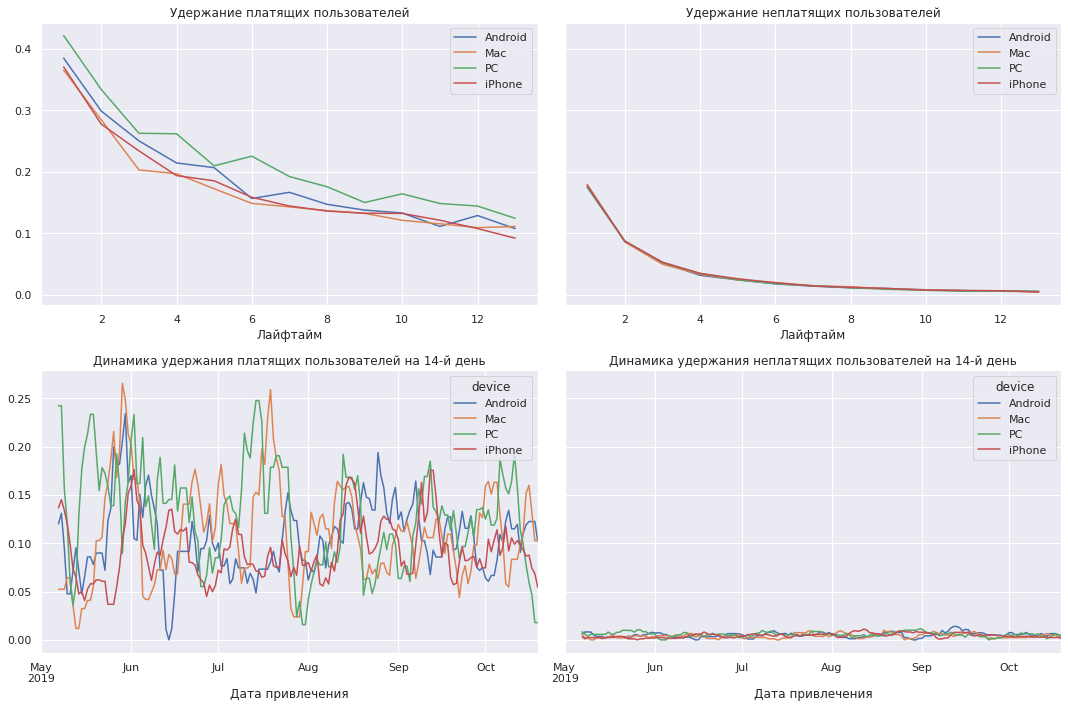

In [63]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

При самой низкой конверсии РС, у данных пользователей самое высокое удержание, и противоположная ситуация у аутсайдера по конверсии у МАС

**Проанализирим окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI**

In [ ]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
    
Хочу акцентировать твоё внимание на способе решения в данном случае комплексной задачи - неокупаемость маркетинга. Мы эту составную проблему раскладываем на частные причины, декомпозируем весь трафик по странам, устройствам, регионам и ищем где конкретно и в какой момент случилась проблема. 
</div>

Окупаются только пользователи Рс (на 11 день) при самой низкой стоимости привлечения, однако по всем показателям прослеживается рост. На LTV влияет сезонный фактор, но и этот показатель достаточно стабилен по всем устройствам

**Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI**

In [ ]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Заметим, что уровень окупаемости самый низкий в США, при наибольшей доле пользователей в этой стране, именно в США пользователи и не окупаются, что связано с самой высокой стоимостью их привлечения.

**Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI**

In [ ]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Не окупились пользователи, привлеченные из каналов AdNonSense, FaceBoom, TipTop, при наибольших затратах на TipTop, именно поэтому стоит задуматься об отмене закупки рекламы на этих каналах

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
    
Чудеса декомпозиции,  отличный подход, который всегда приведёт к успеху, разобрались со всеми метриками, получили явную проблему в US и TIp Top с Faceboom, при учете, что US - страна с наибольшим количеством пользователей, а Tip TOp и FaceBoom - крупнешие каналы для нас это важные находки, дальше с которыми стоит работать</div>


**Окупается ли реклама, направленная на привлечение пользователей в целом?**

Нет, реклама не окупилась, убыток составил 20% рекламного бюджета

**Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?**

Негативно влияют на окупаемость владельцы iphone и mac, а также пользователи из США и каналы AdNonSense, FaceBoom и TipTop

**Чем могут быть вызваны проблемы окупаемости?**

Возможно, проблема окупаемости связана именно с маркетинговой компанией, при самой высокой стоимости привлечения клиента из США туда и тратится больше денег, также стоит отказаться от некоторых каналов привлечения клиентов либо сократить на них расходы (каналы AdNonSense, FaceBoom и TipTop)

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

1) Таким образом, была выполнена переработка данных, изменены типы данных у столбцов с датой и временем, все названия столбцов приведены к змеиному типу. Дубликатов в строках ни в одной из трех таблиц не найдено.

Также было выявлено, что из 309901 пользователей 150008 уникальных. По странам распределение выглядит следующим образом, United States-207327, UK-36419, France-35396, Germany-30759. Распределение устройств выглядит так: iPhone- 112603, Android-72590, PC-62686, Mac-62022. Большинство клиентов пришли самостоятельно.

В таблице о заказах 40212 записей, 8881 пользователей оформивших заказы, а в таблице с затратами на маркетинг 1800 записей с 180 уникальными датами.

2) Был задан момент анализа зададим 1 ноября 2019 года, а горизонт анализа 14 дней, были заданы функции для расчёта и анализа LTV, ROI, удержания и конверсии.

3) Таким образом, на данном этапе были определены лидеры стран по количеству пользователей - больше всего пользователей приходит из США (100002 пользователей или 66,7%), следом идут пользователи из Великобритании и Франции (по 11%), и меньше всего пользователей из Германии(10%).

Разбивка по платящим клиентам немного отличается, лидером опять является СЩА с показателем 6902 пользователя или 6,9% от числа всех пользователей из США, следом идет Германия с показателем 4,1%, у Великабритании 4%, а у Франции 3,8%.

Разбивка по устройствам выглдит следующим образом, iPhone (36,3%), следом Android (23,4%), и по 20% у PC и Mac.

Доля платящих примерно равная на устройствах, но больше у Mac(6,4%) и iPhone (6,2%), у Android 5,9%, PC 5%

Лидеры каналов привлечения идут каналы: organic - 37,6% FaceBoom - 19,4% TipTop - 13,0% По параметру платящих клиентов лидируют каналы: FaceBoom - 12,2 AdNonSense - 11,3% lambdaMediaAds - 10,5%

4) При общей сумме затрат на маркетинг 105497.3, Половина всех трат приходится на TipTop (51,9%), далее идет на FaceBoom с показателем 30,8%, по другим каналам сумма не превышала 5%.

Заметен рост затрат на протяжении всего периода у TipTop и FaceBoom, но следует заметить, что прослеживается увелечение средней стоимости привлечения одного клиента у TipTop с 1 до 3,5, при относительной стабильности других каналов (не более 1,5), что может быть сигналом для пересмотра рекламного бюджета на данный канал.

5) И в конце концов, делаем вывод, что реклама не окупилась, убыток составил 20% рекламного бюджета.

Негативно влияют на окупаемость владельцы iphone и mac, а также пользователи из США и каналы AdNonSense, FaceBoom и TipTop.

Возможно, проблема окупаемости связана именно с маркетинговой компанией, при самой высокой стоимости привлечения клиента из США туда и тратится больше денег, также стоит отказаться от некоторых каналов привлечения клиентов либо сократить на них расходы (каналы AdNonSense, FaceBoom и TipTop)

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
    
* Отличная работа, все критические замечания исправлены, принимаю проект, ты молодец). Касательно рекомендаций, не хватает связи каналов и стран, ведь пользователь пришедший из `US` пришел с какого-то канала, вот этот кусочек пазла позволит получить общую картину. Ну и я считаю важной рекомендацией - чаще обращать внимания на показатели маркетинга, а то очень похоже, что маркетинговый отдел долгое время сжигал деньги не очень эффективно). В работе я оставил некоторое количество мелких рекомендаций от себя, надеюсь ты из них вынесешь что-то для себя и будешь активно применять в будущих проектах и работе.) Рекомендую поработать над оформлением теста `markdown` разметкой и особенно распространить оглавление, его можно сделать более подробным, что упростит навигацию по проекту, сейчас твоё оглавление выглядит так 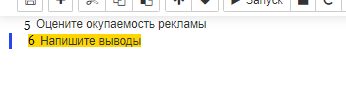
    
* О том, как **форматировать текст** в Markdown ячейке или как добавлять ссылки, ты можешь узнать [тут](https://sqlbak.com/blog/jupyter-notebook-markdown-cheatsheet) и [вот тут](https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd).
    
* В части по анализу графиков я оставил несколько вопросов, но так как проект я принимаю не хочу оставлять тебя без ответов. В более ровном удержании виновато число пользователей. Когда говорим об удержании платящих, видим величину волатильную, но это не из-за её природы, а из-за того, что наблюдений мало, и каждое отдельное наблюдение существенно влияет на оценку, такая особенность часто может проявляться в анализе, так что рекомендую проверять число наблюдений, чтобы не ошибаться с выводами.
   
* Сейчас работаю аналитиком в отделе закупки игровой компании и US это действительно наибольший рынок, ему достается процентов 30-40 всего трафика, да набор каналов существенно шире, но US доминирует в этом плане. Конечно у нас перед глазами набор дашбордов, которые позволяют контролировать множество всяких метрик, но периодически бывает всякое, конечно же масштабирование канала, который становится всё хуже и хуже - сомнительная идея, а оптимизации происходят существенно чаще, по некоторым каналам раз в неделю, а по некоторым и ещё чаще). Благодарю за совместную работу, поздравляю с наступающими праздниками, желаю удачи!) 
    
</div>